## Spam Classifier

The above project is about the predicting the spam mails using the dataset given.We are going to use NLP and ML libraries such as

-NLTK and string to get the meaningful and necessary text from the reviews

-Matplotlib,Seaborn and Wordcloud to get the visual insights of the data we extracted.

-scikit learn library to process the data for the result using the various algorithms i.e Naive_Bayes,Decision Tree and Random Forest Classifier and Support Vector Machine.

In [1]:
#importing required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
import seaborn as sns
#importing warning to suppress where needed
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#accesing the data from file folder
s=pd.read_csv("/content/drive/My Drive/messages.csv")
sms=pd.DataFrame(s)
#lets see the format
sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
#as we see there is presence of some null value,so check on the whole
sms.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [4]:
#dropping the null values
sms.dropna(inplace=True)

In [5]:
#lets see the shape of the data
sms.shape

(2831, 3)

In [6]:
sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0


In [7]:
#checking for the datatypes
sms.dtypes

subject    object
message    object
label       int64
dtype: object

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Cleaning and data preprocessing

In [9]:
#applying loops and techniques wherever required
for col in sms.columns:
    if sms[col].dtypes==object:
        
        sms[col]=sms[col].str.lower()
        
        # Replace email addresses with 'email'
        sms[col] = sms[col].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                         'emailaddress')

        # Replace URLs with 'webaddress'
        sms[col] = sms[col].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                          'webaddress')

        # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
        sms[col] = sms[col].str.replace(r'£|\$', 'dollers')

        # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
        sms[col] = sms[col].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                          'phonenumber')


        # Replace numbers with 'numbr'
        sms[col] = sms[col].str.replace(r'\d+(\.\d+)?', 'numbr')
        

In [10]:
#removing punctuations and stopwords
import string
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
for col in sms.columns:
    if sms[col].dtypes==object:
        sms[col]=sms[col].str.translate(str.maketrans('', '', string.punctuation))
        sms[col] = sms[col].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [11]:
sms

,subject,message,label
0,job posting appleiss research center,content length numbr appleiss research center ...,0
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0
3,risk,colleague researching differing degrees risk p...,0
4,request book information,earlier morning phone friend mine living south...,0
5,call abstracts optimality syntactic theory,content length numbr call papers best good eno...,0
...,...,...,...
2888,love profile ysuolvpv,hello thanks stopping taken many new pics made...,1
2889,asked join kiddin,list owner kiddin invited join mailing list li...,1
2890,anglicization composers names,judging return post must sounded like kind sel...,0
2891,numbr numbr comparative method n ary comparison,gotcha two separate fallacies argument nary co...,0


In [12]:
# we see the column subject is the summarise or just the overview for the column messag,so while creating dictionary,
#its better to process message as it covers subject elements too
from collections import defaultdict
from gensim import corpora
import pprint

stoplist = set('for a of the and to in'.split(' '))

# split it by white space and filter out stopwords
for i in sms['message']:
    texts = [[word for word in i.split() if word not in stoplist] for i in sms['message']]

frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)

Streaming output truncated to the last 5000 lines.
  'one',
  'hottest',
  'phone',
  'girls',
  'net',
  'n',
  'h',
  'n',
  'g',
  'wont',
  'talk',
  'love',
  'suck',
  'lick',
  'shows',
  'single',
  'numbr',
  'yrs',
  'old',
  'green',
  'eyes',
  'big',
  'talking',
  'sexy',
  'guys',
  'net',
  'three',
  'years',
  'love',
  'half',
  'people',
  'call',
  'call',
  'back',
  'second',
  'time',
  'regular',
  'callers',
  'world',
  'small',
  'owner',
  'operated',
  'business',
  'phonesex',
  'right',
  'home',
  'bedroom',
  'waiting',
  'call',
  'enjoy',
  'course',
  'participate',
  'let',
  'guys',
  'fun',
  'questions',
  'call',
  'home',
  'free',
  'information',
  'want',
  'get',
  'keep',
  'business',
  'professionalism',
  'offer',
  'consistent',
  'quality',
  'nothing',
  'mailed',
  'home',
  'name',
  'sold',
  'traded',
  'lonely',
  'horny',
  'call',
  'baby',
  'numbrnumbr',
  'numbr',
  'non',
  'us',
  'canada',
  'studs',
  'call',
  'numbrn

In [13]:
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(30860 unique tokens: ['acoustic', 'advantage', 'analysis', 'apple', 'apply']...)


In [14]:
# Vector representation 
pprint.pprint(dictionary.token2id)

Streaming output truncated to the last 5000 lines.
 'spring': 609,
 'springboards': 27144,
 'springer': 4415,
 'springfield': 8712,
 'springs': 2283,
 'spritle': 22110,
 'sproat': 1818,
 'sprouse': 21116,
 'sps': 21913,
 'spscob': 16159,
 'spsu': 26960,
 'spuiboulevard': 25079,
 'spuistraat': 5949,
 'spun': 29261,
 'spurious': 9018,
 'spurred': 8157,
 'spurs': 15690,
 'spy': 14152,
 'spyridoula': 4181,
 'sq': 22834,
 'sql': 24283,
 'squamish': 8404,
 'square': 6429,
 'squared': 29622,
 'squarely': 25982,
 'squartini': 29251,
 'squash': 9164,
 'squib': 29951,
 'squibs': 18565,
 'sr': 6091,
 'sravnenija': 6092,
 'sri': 12280,
 'srichampa': 20719,
 'sridhar': 17109,
 'srihari': 5821,
 'srikant': 27024,
 'sring': 13192,
 'srinivas': 27476,
 'srinivasan': 23888,
 'srivastava': 18380,
 'srnumbr': 13661,
 'srv': 11502,
 'ss': 2583,
 'ssaisb': 6750,
 'ssara': 2947,
 'sseu': 8644,
 'ssful': 29345,
 'ssila': 8973,
 'ssl': 20797,
 'ssnumbr': 21082,
 'sspregister': 1645,
 'ssrc': 26354,
 'sssss': 

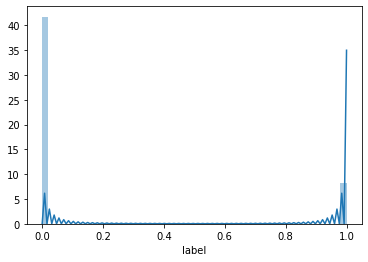

In [15]:
# Message distribution of label=1/spam
sns.distplot(sms['label']==1)

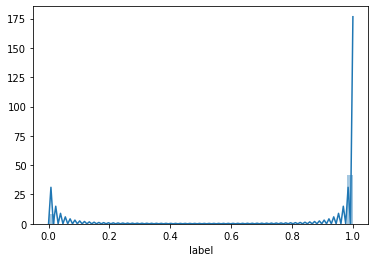

In [16]:
# Message distribution of label=0/ham
sns.distplot(sms['label']==0)

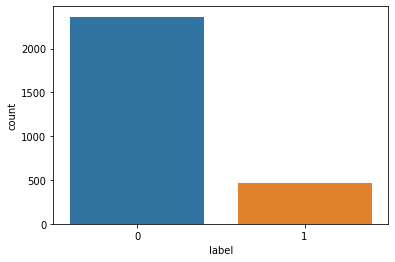

In [17]:
#lets get the count for both labels
sns.countplot(sms['label'])

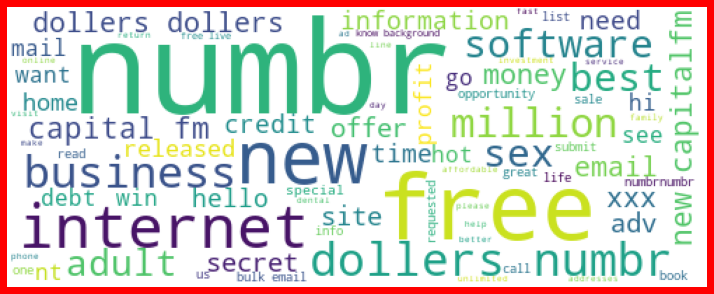

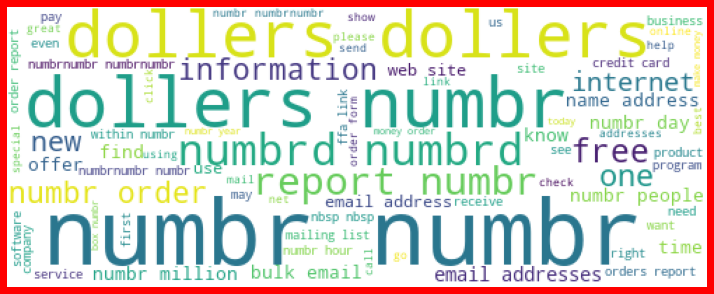

In [18]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud
for col in sms.columns:
    if sms[col].dtypes==object:

      spams = sms[col][sms['label']==1]

      spam_cloud = WordCloud(width=500,height=200,background_color='white',max_words=75).generate(' '.join(spams))

      plt.figure(figsize=(10,8),facecolor='r')
      plt.imshow(spam_cloud)
      plt.axis('off')
      plt.tight_layout(pad=1)
      plt.show()
#first block shows wordcloud for subject column while second one is for the message

The above wordcloud clearly shows that the message content are some of the words used in spam.

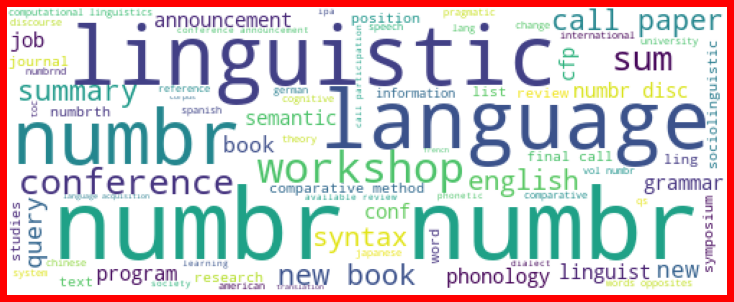

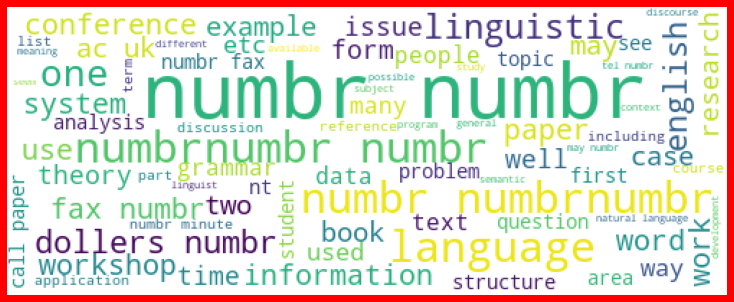

In [19]:
#Getting sense of loud words in ham
from wordcloud import WordCloud
for col in sms.columns:
    if sms[col].dtypes==object:

      hams = sms[col][sms['label']==0]

      ham_cloud = WordCloud(width=500,height=200,background_color='white',max_words=75).generate(' '.join(hams))

      plt.figure(figsize=(10,8),facecolor='r')
      plt.imshow(ham_cloud)
      plt.axis('off')
      plt.tight_layout(pad=0)
      plt.show()

This wordcloud consists of some geniune words used in personal context or professional too

In [20]:
#importing required modelling techniques and metrics for evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve

In [21]:
tf_id=TfidfVectorizer()

In [22]:
#seperating input and output variables
list=['subject','message']
for val in list:
  x=tf_id.fit_transform(sms[val])

y=sms['label']

In [23]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print("Accuracy_score",accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [24]:
#Function for roc curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(alg)
    plt.show()
    
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_score=',roc_score)

In [25]:
#splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)

### Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
model(mnb)

score= 0.8792194092827004
Accuracy_score 0.8684491978609625
[[790   0]
 [123  22]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       790
           1       1.00      0.15      0.26       145

    accuracy                           0.87       935
   macro avg       0.93      0.58      0.60       935
weighted avg       0.89      0.87      0.82       935



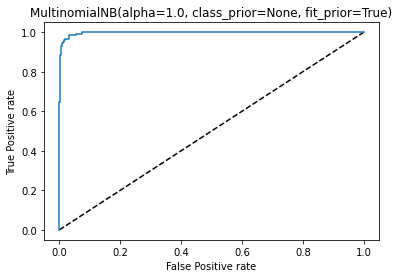

roc_score= 0.5758620689655173


In [27]:
roc(mnb)

### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model(dtc)

score= 1.0
Accuracy_score 0.9540106951871657
[[767  23]
 [ 20 125]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       790
           1       0.84      0.86      0.85       145

    accuracy                           0.95       935
   macro avg       0.91      0.92      0.91       935
weighted avg       0.95      0.95      0.95       935



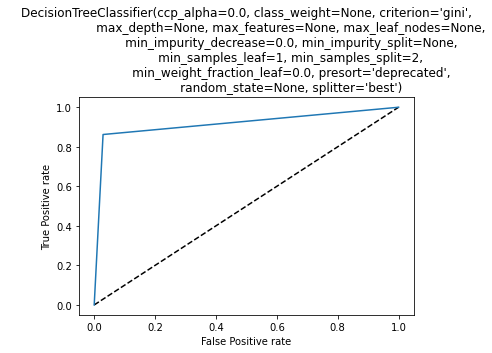

roc_score= 0.9164775207333042


In [29]:
roc(dtc)

### Random forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

#determining best estimators
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rf,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [31]:
rf=RandomForestClassifier(n_estimators=500)
model(rf)

score= 1.0
Accuracy_score 0.9743315508021391
[[790   0]
 [ 24 121]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       790
           1       1.00      0.83      0.91       145

    accuracy                           0.97       935
   macro avg       0.99      0.92      0.95       935
weighted avg       0.98      0.97      0.97       935



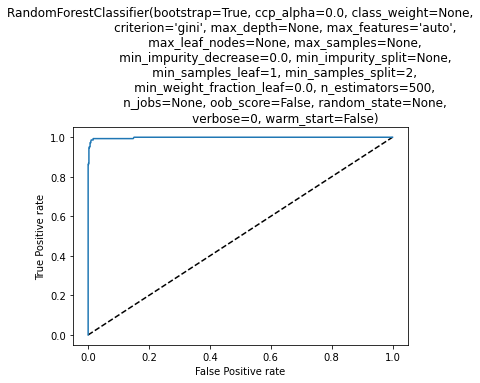

roc_score= 0.9172413793103449


In [32]:
roc(rf)

### Support vector machine

In [33]:
from sklearn.svm import SVC
svm=SVC()

#detrmining proper kernel to use
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [34]:
svm=SVC(kernel='linear',probability=True)
model(svm)

score= 1.0
Accuracy_score 0.983957219251337
[[789   1]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       790
           1       0.99      0.90      0.95       145

    accuracy                           0.98       935
   macro avg       0.99      0.95      0.97       935
weighted avg       0.98      0.98      0.98       935



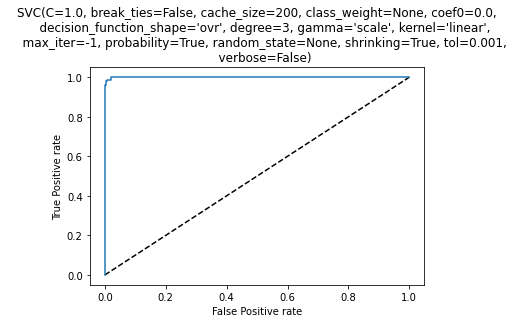

roc_score= 0.9510912265386294


In [35]:
roc(svm)

We get the best accuracy from the Support Vector Machine Algorithm for this dataset where accuracy=0.983957219251337 and roc_auc_score=0.9510912265386294.
So lets take it as a final algorithm for this problem.

### saving the model

In [36]:
from sklearn.externals import joblib
joblib.dump(svm,"svm_spamclassifier.pkl")

['svm_spamclassifier.pkl']